# Intern NAME: GANESH YK

## Task:To Explore Supervised Machine Learning


## Task Objective :Student's Percentage Prediction Model

###### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 
Data can be found at http://bit.ly/w-data


###### Problem Statement: What will be predicted score if a student study for 9.25 hrs in a day? 

# STEP:1 Importing the Required Libraries


In [19]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
#Import the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data1=data
print("The data is imported successfully")
data

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now we have to check whether the obtain data contains null value or not,if the data contains null value then data cleaning have to be done. 

In [4]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no null values and hence data cleaning is not required.

In [36]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## STEP:2 DATA VISUALIZATION
Let's plot the obtained data for better understanding and Visualization.

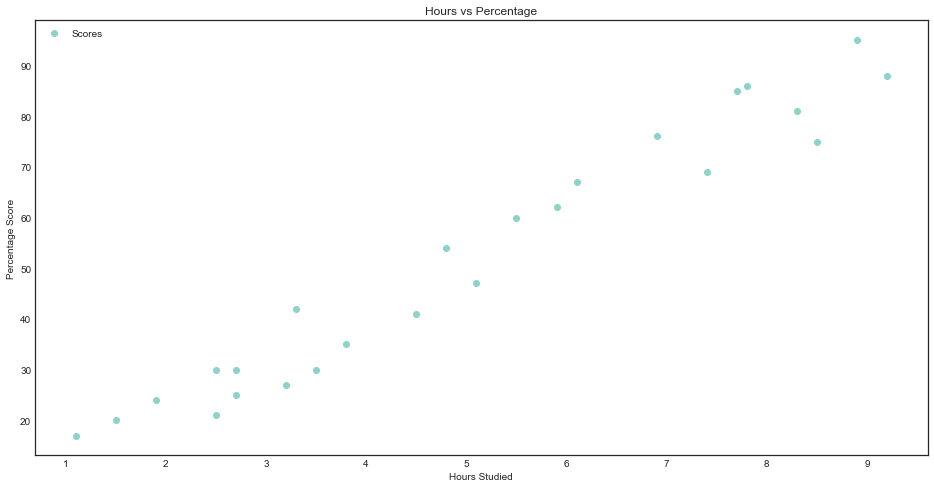

In [45]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o',figsize=(16,8))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Text(0, 0.5, 'Scores obtained')

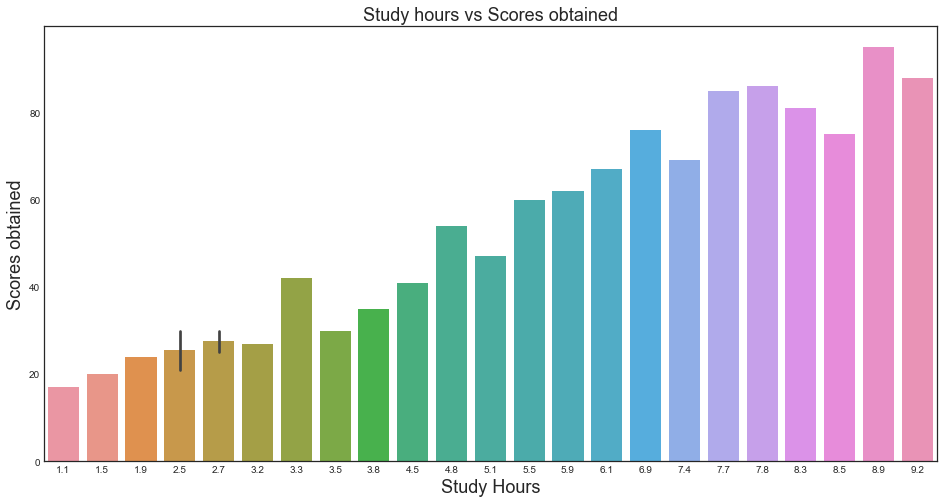

In [9]:
plt.style.use('seaborn-white')
plt.figure(figsize=(16,8))
sns.barplot(x='Hours',y='Scores',data=data)
plt.title('Study hours vs Scores obtained',size=18)
plt.xlabel('Study Hours',size=18)
plt.ylabel('Scores obtained',size=18)

# STEP:3 Linear Regression Model

Now we prepare the data and split it in test data 

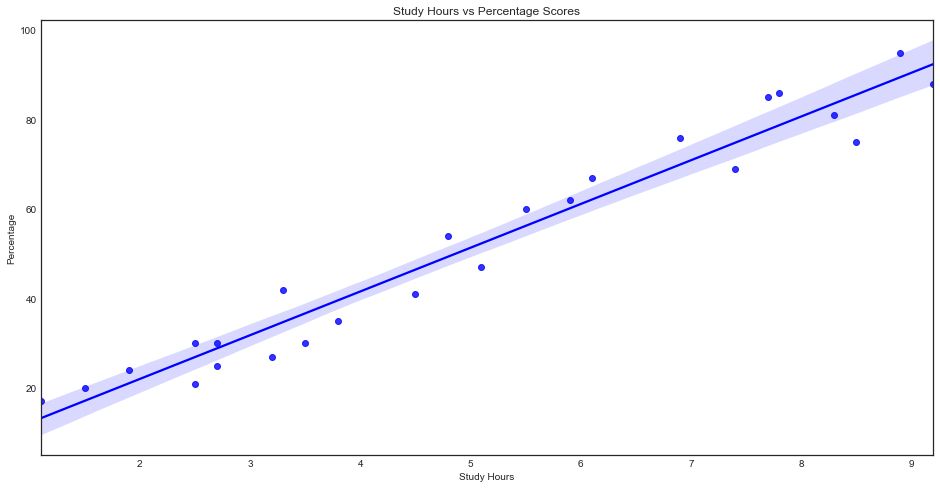

In [12]:
#plotting regressor plot to determine the relationship between feature and target
plt.figure(figsize=(16,8))
sns.regplot(x=data['Hours'],y=data['Scores'],data=data,color='blue')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

###### From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.

###### Preparing our data
Next is to define our "attributes"(input) variable and "labels"(output)

In [14]:
x=data.iloc[:,:-1].values  #Attributes
y=data.iloc[:,1].values   #Labels


Now that we have the attributes and labels defined, the next step is to split this data into training and test sets.

We will use sklearn's train_test_split to split the data into testing and training set

In [15]:
# Using Scikit-Learn's built-in train_test_split() method:
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)

We have the training and testing sets ready for training our model.


# STEP:4 Training the model


First I will be making our linear regression algorithm from scratch and then I will compare it with the built-in function sklearn.linear_model.LinearRegression()

#### Making the linear regression from scratch

In [20]:
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict= linearRegressor.predict(x_train)

In [21]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training Process is completed.")

Training Process is completed.


###### Now once the data are fitted to the model, we can try to plot the best fit line(regression line) which has less error.**

Finding the coefficient  of the data

In [22]:
print(regressor.coef_)

[9.91065648]


Finding the intercept of the data

In [23]:
print(regressor.intercept_)

2.018160041434683


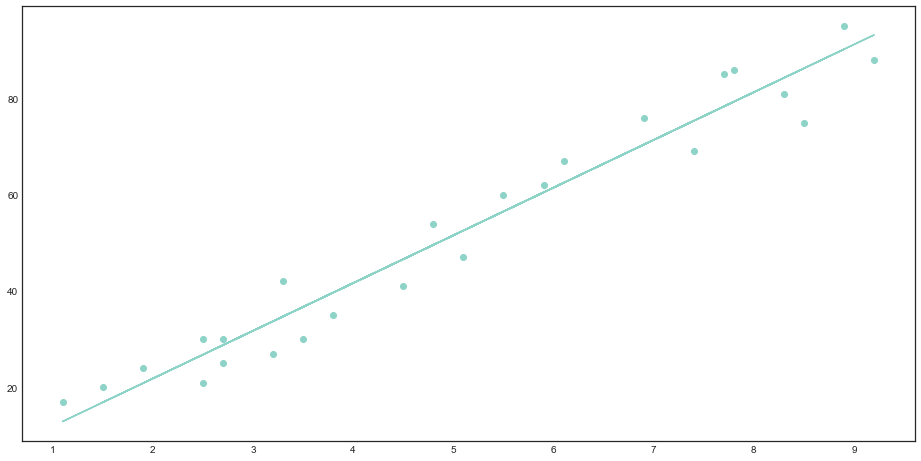

In [47]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_
# Plotting for the test data
plt.figure(figsize=(16,8))
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# STEP:5 Checking the accuracy scores for training and test set

In [30]:
print('Test Score:',regressor.score(x_test, y_test))
print('Training Score:',regressor.score(x_train, y_train))

Test Score: 0.9454906892105356
Training Score: 0.9515510725211552


## Now we make predictions

In [33]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [34]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [35]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.69173249]


# STEP:6 Model Evaluation Metrics

In [46]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
